In [4]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import expit
from scipy.optimize import minimize
import warnings

In [5]:
np.random.seed(1234)
n_sample = 1000
x1 = np.random.multivariate_normal([2,3],[[1, 0.5],[0.5,1]], size=n_sample)
x2 = np.random.multivariate_normal([3,4],[[1, -0.5],[-0.5,1]], size=n_sample)
xs = np.vstack([x1, x2])
ys = np.array([1.]*n_sample+[-1.]*n_sample)

In [6]:
def pad_data(x):
    return np.pad(x, ((0,0), (1,0)), constant_values=1.)
padded_xs = pad_data(xs)

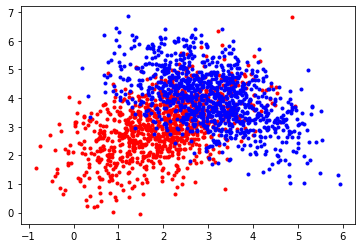

In [7]:
pos_x = xs[ys==1]
neg_x = xs[ys==-1]
plt.plot(pos_x[:,0], pos_x[:,1], '.r')
plt.plot(neg_x[:,0], neg_x[:,1], '.b')

In [8]:
def cost(w):
    ps = expit(ys*np.dot(padded_xs, w))
    return -np.sum(np.log(ps))

minimize(cost, [1.,2.,1.])

      fun: 921.8242183933326
 hess_inv: array([[ 0.1188274 , -0.01656711, -0.01994774],
       [-0.01656711,  0.00464762,  0.00122645],
       [-0.01994774,  0.00122645,  0.00462253]])
      jac: array([ 0.00000000e+00, -7.62939453e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 130
      nit: 19
     njev: 26
   status: 0
  success: True
        x: array([ 7.10375829, -1.19896134, -1.13165172])

In [9]:
class Logistic:
    def __init__(self, w=None):
        self.w = w
    
    def train(self, xs, ys, w0=None):
        padded_xs = pad_data(xs)
        if w0 is None:
            w0 = np.array([0.]*padded_xs.shape[1])
        def cost(w):
            ps = expit(ys*np.dot(padded_xs, w))
            return -np.sum(np.log(ps))
        res = minimize(cost, w0)
        self.w = res.x
        if not res.success:
            warnings.warn(res.message)
        return self
    
    def predict(self, xs):
        padded_xs = pad_data(xs)
        return expit(np.dot(padded_xs, self.w))
    

    

(array([24., 74., 88., 85., 75., 66., 65., 60., 61., 43., 51., 40., 40.,
        30., 31., 28., 27., 20., 17., 13., 12., 20., 13., 10.,  2.,  4.,
         0.,  1.,  0.]),
 array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
        0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
        0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
        0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
        0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
        0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ]),
 <a list of 29 Patch objects>)

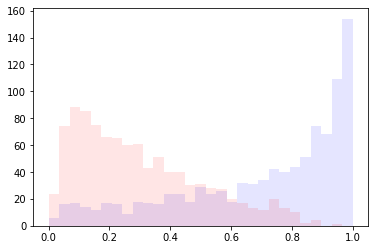

In [10]:
lgst = Logistic().train(xs, ys)
pred = lgst.predict(xs)
plt.hist(pred[ys==1],color='b',bins=np.linspace(0,1,30), alpha=0.1)
plt.hist(pred[ys==-1],color='r',bins=np.linspace(0,1,30), alpha=0.1)

(array([ 6., 55., 77., 90., 81., 79., 69., 73., 72., 47., 64., 42., 38.,
        42., 31., 31., 17., 17., 15., 18., 14., 12.,  5.,  1.,  3.,  0.,
         1.,  0.,  0.]),
 array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
        0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
        0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
        0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
        0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
        0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ]),
 <a list of 29 Patch objects>)

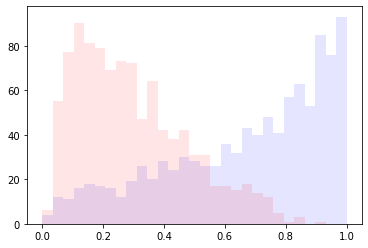

In [11]:
lgst = Logistic(np.array([6,-1,-1.]))
pred = lgst.predict(xs)
plt.hist(pred[ys==1],color='b',bins=np.linspace(0,1,30), alpha=0.1)
plt.hist(pred[ys==-1],color='r',bins=np.linspace(0,1,30), alpha=0.1)